<h1>Task 1: Data Analysis and Preprocessing</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Embedding, SimpleRNN
import mlflow
import mlflow.sklearn
import mlflow.tensorflow
import shap
import lime
import lime.lime_tabular

In [2]:
# Load datasets
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_address_data = pd.read_csv('../data/IpAddress_to_Country.csv')
credit_card_data = pd.read_csv('../data/creditcard.csv')

fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
ip_address_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [4]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check for missing values in fraud_data
missing_values_fraud_data = fraud_data.isnull().sum()
print("Missing values in Fraud_Data.csv:")
print(missing_values_fraud_data)
print("\n")

# Check for missing values in ip_to_country
missing_values_ip_address_data = ip_address_data.isnull().sum()
print("Missing values in IpAddress_to_Country.csv:")
print(missing_values_ip_address_data)
print("\n")

# Check for missing values in credit_card_data
missing_values_credit_card_data = credit_card_data.isnull().sum()
print("Missing values in creditcard.csv:")
print(missing_values_credit_card_data)
print("\n")

Missing values in Fraud_Data.csv:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


Missing values in IpAddress_to_Country.csv:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


Missing values in creditcard.csv:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64




In [3]:
# Removing missing values
fraud_data.dropna(inplace=True)
ip_address_data.dropna(inplace=True)
credit_card_data.dropna(inplace=True)

In [4]:
# Data Cleaning
fraud_data.drop_duplicates(inplace=True)
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Create hour_of_day and day_of_week features from purchase_time
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

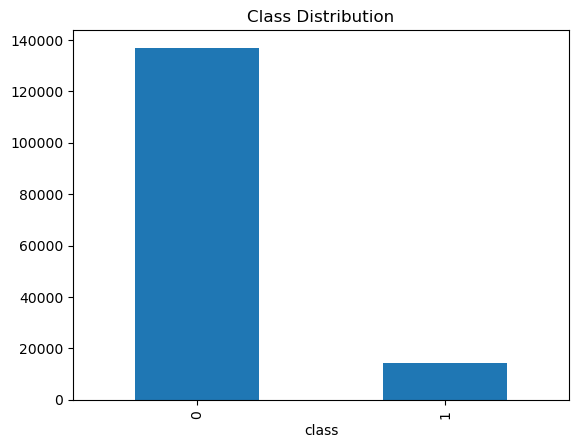

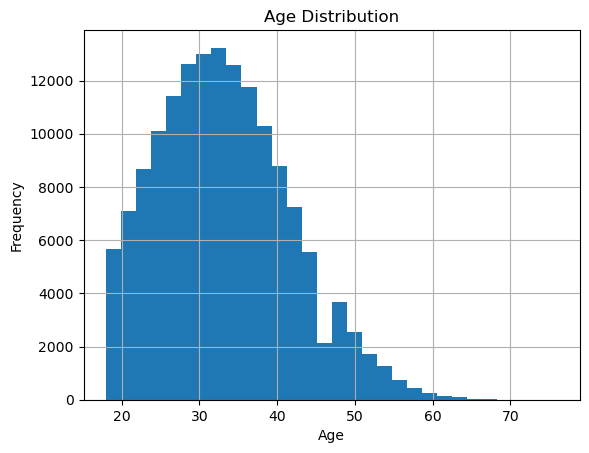

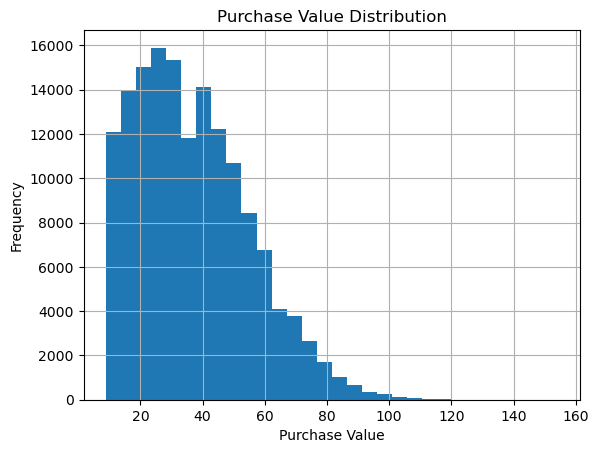

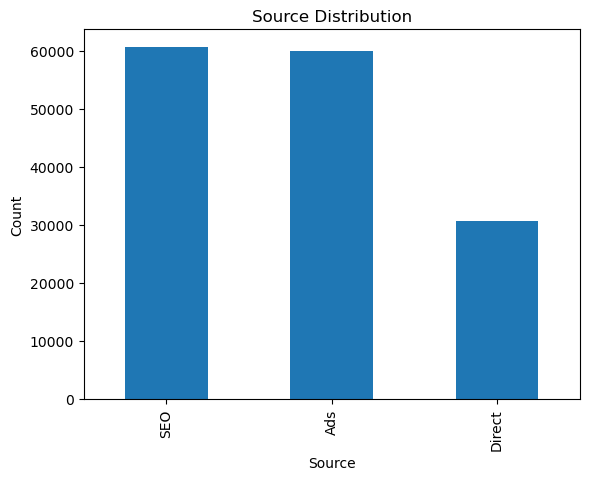

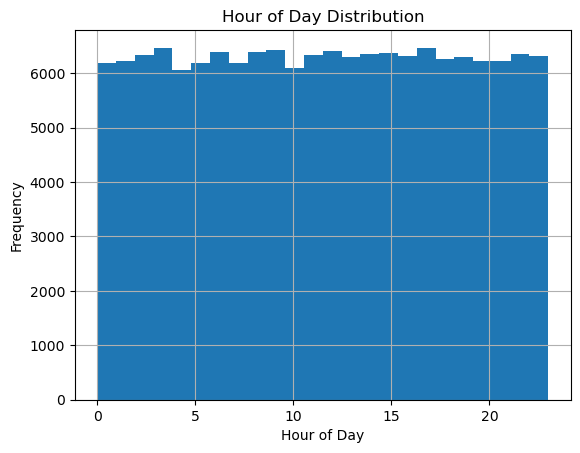

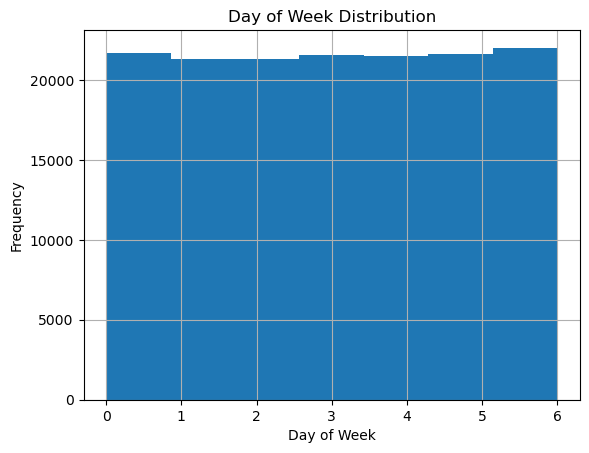

In [8]:
# Univariate analysis for the class
fraud_data['class'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

# Univariate analysis of 'age'
fraud_data['age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Univariate analysis of 'purchase_value'
fraud_data['purchase_value'].hist(bins=30)
plt.title('Purchase Value Distribution')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()

# Univariate analysis of 'source'
fraud_data['source'].value_counts().plot(kind='bar', title='Source Distribution')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

# Univariate analysis of 'hour_of_day'
fraud_data['hour_of_day'].hist(bins=24)
plt.title('Hour of Day Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

# Univariate analysis of 'day_of_week'
fraud_data['day_of_week'].hist(bins=7)
plt.title('Day of Week Distribution')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

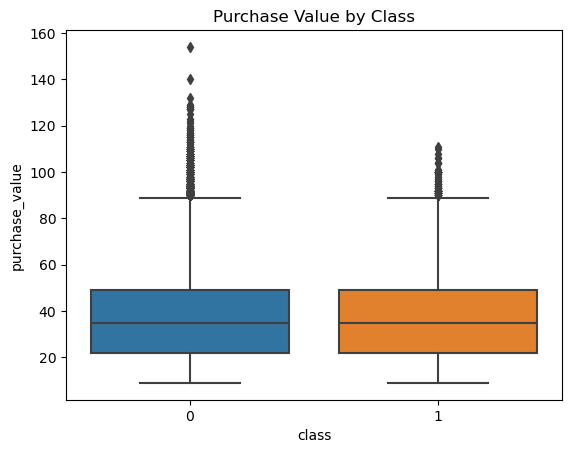

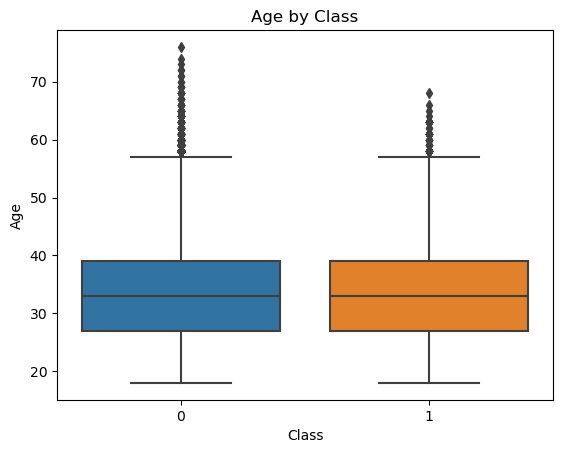

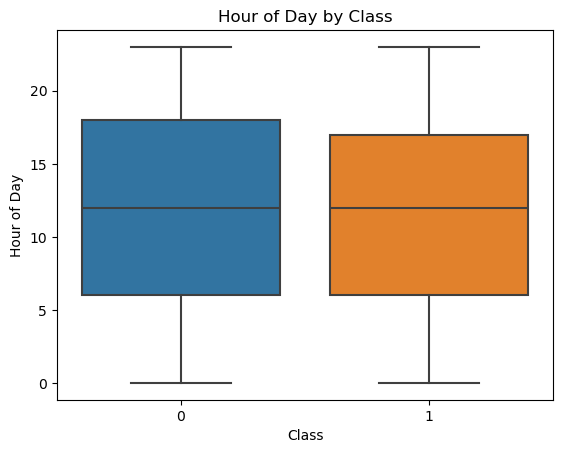

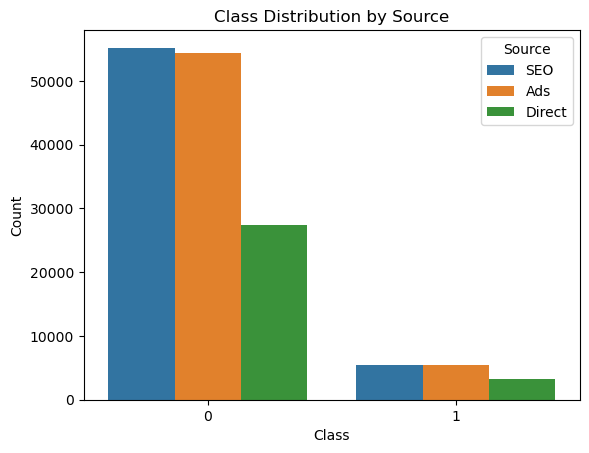

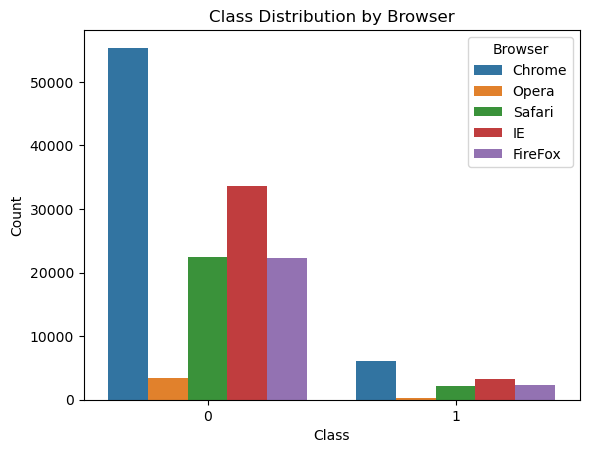

In [9]:
# Bivariate analysis between class and purchase value
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value by Class')
plt.show()

# Bivariate analysis of 'class' and 'age'
sns.boxplot(x='class', y='age', data=fraud_data)
plt.title('Age by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

# Bivariate analysis of 'class' and 'hour_of_day'
sns.boxplot(x='class', y='hour_of_day', data=fraud_data)
plt.title('Hour of Day by Class')
plt.xlabel('Class')
plt.ylabel('Hour of Day')
plt.show()

# Bivariate analysis of 'class' and 'source'
sns.countplot(x='class', hue='source', data=fraud_data)
plt.title('Class Distribution by Source')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Source')
plt.show()

# Bivariate analysis of 'class' and 'browser'
sns.countplot(x='class', hue='browser', data=fraud_data)
plt.title('Class Distribution by Browser')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Browser')
plt.show()

In [5]:
# Merging IpAddress Data with Fraud Data to get country information
def ip_to_country(ip):
    try:
        return ip_address_data[(ip_address_data['lower_bound_ip_address'] <= ip) &
                               (ip_address_data['upper_bound_ip_address'] >= ip)]['country'].iloc[0]
    except IndexError:
        return 'Unknown'

fraud_data['country'] = fraud_data['ip_address'].apply(ip_to_country)

In [6]:
## Transaction frequency and velocity features
fraud_data['transaction_time_diff'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds()

# Normalization and Scaling (if needed)
# Example: Min-Max scaling of 'purchase_value'
fraud_data['purchase_value_scaled'] = (fraud_data['purchase_value'] - fraud_data['purchase_value'].min()) / (fraud_data['purchase_value'].max() - fraud_data['purchase_value'].min())

In [8]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,country,transaction_time_diff,purchase_value_scaled
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,2,5,Japan,4506682.0,0.172414
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,0,United States,17944.0,0.048276
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,18,3,United States,1.0,0.041379
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,13,0,Unknown,492085.0,0.241379
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,18,2,United States,4361461.0,0.206897


<h1>Task 2: Model Building and Training</h1>

In [7]:
# Separate features and target for Fraud_Data
X_fraud = fraud_data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'class', 'country'], axis=1)
y_fraud = fraud_data['class']

# Encode categorical variables for Fraud_Data
categorical_cols = ['source', 'browser', 'sex']
numerical_cols = ['purchase_value', 'age', 'transaction_time_diff', 'hour_of_day', 'day_of_week']

preprocessor_fraud = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_fraud_encoded = preprocessor_fraud.fit_transform(X_fraud)

# Split data into train and test sets for Fraud_Data
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_fraud_encoded, y_fraud, test_size=0.2, random_state=42)

In [32]:
print(X_credit.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [8]:
# Separate features and target
X_credit = credit_card_data.drop('Class', axis=1)
y_credit = credit_card_data['Class']

# Update numerical_cols_credit with all columns
numerical_cols_credit = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                         'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 
                         'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 
                         'V27', 'V28', 'Amount']

# Since there are no categorical columns, define an empty list for categorical_cols_credit
categorical_cols_credit = []

# Define ColumnTransformer with numerical_cols_credit
preprocessor_credit = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_credit)
    ])

# Apply ColumnTransformer to X_credit
X_credit_encoded = preprocessor_credit.fit_transform(X_credit)

# Split data into train and test sets for CreditCard_Data
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit_encoded, y_credit, test_size=0.2, random_state=42)

In [16]:
# Initialize models for Fraud_Data
models_fraud = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP': MLPClassifier(max_iter=500),
}

# Initialize models for creditcard_data
models_credit = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP': MLPClassifier(max_iter=500),
}

In [17]:
# Train and evaluate models for Fraud_Data
for name, model in models_fraud.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor_fraud),
                           ('classifier', model)])
    pipe.fit(X_train_fraud, y_train_fraud)
    y_pred_fraud = pipe.predict(X_test_fraud)
    accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
    roc_auc_fraud = roc_auc_score(y_test_fraud, y_pred_fraud)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_fraud}")
    print(f"ROC AUC: {roc_auc_fraud}")
    print(classification_report(y_test_fraud, y_pred_fraud))

Model: Logistic Regression
Accuracy: 0.9057009562253913
ROC AUC: 0.5
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27373
           1       0.00      0.00      0.00      2850

    accuracy                           0.91     30223
   macro avg       0.45      0.50      0.48     30223
weighted avg       0.82      0.91      0.86     30223



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Decision Tree
Accuracy: 0.9036826258147769
ROC AUC: 0.753347914227171
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     27373
           1       0.49      0.57      0.53      2850

    accuracy                           0.90     30223
   macro avg       0.72      0.75      0.74     30223
weighted avg       0.91      0.90      0.91     30223

Model: Random Forest
Accuracy: 0.9562915660258743
ROC AUC: 0.7688743037222618
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27373
           1       1.00      0.54      0.70      2850

    accuracy                           0.96     30223
   macro avg       0.98      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223

Model: Gradient Boosting
Accuracy: 0.9564239155609966
ROC AUC: 0.7689473684210526
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27373


In [18]:
# Train and evaluate models for creditcard_data
for name, model in models_credit.items():
    pipe = Pipeline(steps=[('scaler', StandardScaler()),
                           ('classifier', model)])
    pipe.fit(X_train_credit, y_train_credit)
    y_pred_credit = pipe.predict(X_test_credit)
    accuracy_credit = accuracy_score(y_test_credit, y_pred_credit)
    roc_auc_credit = roc_auc_score(y_test_credit, y_pred_credit)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_credit}")
    print(f"ROC AUC: {roc_auc_credit}")
    print(classification_report(y_test_credit, y_pred_credit))

Model: Logistic Regression
Accuracy: 0.9991222218320986
ROC AUC: 0.7907371903460314
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Model: Decision Tree
Accuracy: 0.9992099996488887
ROC AUC: 0.8926461130315941
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.79      0.77        98

    accuracy                           1.00     56962
   macro avg       0.88      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Model: Random Forest
Accuracy: 0.9995611109160493
ROC AUC: 0.8877287233126226
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     568

In [22]:
# Prepare data for neural network models
scaler = StandardScaler()
X_train_fraud_scaled = scaler.fit_transform(preprocessor_fraud.fit_transform(X_train_fraud))
X_test_fraud_scaled = scaler.transform(preprocessor_fraud.transform(X_test_fraud))
X_train_credit_scaled = scaler.fit_transform(X_train_credit)
X_test_credit_scaled = scaler.transform(X_test_credit)

# Reshape data for CNN and LSTM
X_train_fraud_cnn = X_train_fraud_scaled.reshape(X_train_fraud_scaled.shape[0], X_train_fraud_scaled.shape[1], 1)
X_test_fraud_cnn = X_test_fraud_scaled.reshape(X_test_fraud_scaled.shape[0], X_test_fraud_scaled.shape[1], 1)
X_train_credit_cnn = X_train_credit_scaled.reshape(X_train_credit_scaled.shape[0], X_train_credit_scaled.shape[1], 1)
X_test_credit_cnn = X_test_credit_scaled.reshape(X_test_credit_scaled.shape[0], X_test_credit_scaled.shape[1], 1)


In [23]:
# Define CNN model
def create_cnn(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define RNN model
def create_rnn(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define LSTM model
def create_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [27]:
# Train and evaluate neural network models for Fraud_Data
for model_name, model_fn in zip(['CNN', 'RNN', 'LSTM'], [create_cnn, create_rnn, create_lstm]):
    model = model_fn((X_train_fraud_cnn.shape[1], 1))
    model.fit(X_train_fraud_cnn, y_train_fraud, epochs=10, batch_size=32, verbose=1)
    y_pred = model.predict(X_test_fraud_cnn)
    y_pred = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test_fraud, y_pred)
    roc_auc = roc_auc_score(y_test_fraud, y_pred)
    print(f"Fraud_Data - {model_name} Model")
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(classification_report(y_test_fraud, y_pred))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9144 - loss: 0.2653
Epoch 2/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9379 - loss: 0.2172
Epoch 3/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9432 - loss: 0.2065
Epoch 4/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9441 - loss: 0.2048
Epoch 5/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9454 - loss: 0.2023
Epoch 6/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9462 - loss: 0.2008
Epoch 7/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9465 - loss: 0.2016
Epoch 8/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9479 - loss: 0.1978
Epoch 9/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9482 - loss: 0.1967
Epoch 10/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9499 - loss: 0.1918
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fraud_Data - CNN Model
Accuracy: 0.9494755649670781
ROC AUC: 0.765582988999917

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3778/3778 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9042 - loss: 0.2948
Epoch 2/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9325 - loss: 0.2249
Epoch 3/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9380 - loss: 0.2142
Epoch 4/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9423 - loss: 0.2076
Epoch 5/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9431 - loss: 0.2064
Epoch 6/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9447 - loss: 0.2041
Epoch 7/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9460 - loss: 0.2017
Epoch 8/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9467 - loss: 0.2024
Epoch 9/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9483 - loss: 0.1987
Epoch 10/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9475 - loss: 0.2002
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Fraud_Data - RNN Model
Accuracy: 0.9488138172914667
ROC AUC: 0.7675752518328665
  

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3778/3778 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9063 - loss: 0.3018
Epoch 2/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9360 - loss: 0.2179
Epoch 3/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9402 - loss: 0.2129
Epoch 4/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9421 - loss: 0.2095
Epoch 5/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9442 - loss: 0.2039
Epoch 6/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9444 - loss: 0.2058
Epoch 7/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9463 - loss: 0.2018
Epoch 8/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9465 - loss: 0.1998
Epoch 9/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9470 - loss: 0.2004
Epoch 10/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9474 - loss: 0.1984
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Fraud_Data - LSTM Model
Accuracy: 0.9473248850213414
ROC AUC: 0.767224791236850

In [28]:
# Train and evaluate neural network models for creditcard_data
for model_name, model_fn in zip(['CNN', 'RNN', 'LSTM'], [create_cnn, create_rnn, create_lstm]):
    model = model_fn((X_train_credit_cnn.shape[1], 1))
    model.fit(X_train_credit_cnn, y_train_credit, epochs=10, batch_size=32, verbose=1)
    y_pred = model.predict(X_test_credit_cnn)
    y_pred = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test_credit, y_pred)
    roc_auc = roc_auc_score(y_test_credit, y_pred)
    print(f"CreditCard_Data - {model_name} Model")
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(classification_report(y_test_credit, y_pred))

Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9985 - loss: 0.0102
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9994 - loss: 0.0034
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9994 - loss: 0.0030
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0.0029
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9994 - loss: 0.0030
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0036
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0028
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9995 - loss: 0.0027
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0027
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9994 - loss: 0.0025
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
CreditCard_Data - CNN Model
Accuracy: 0.9995084442259752
ROC AUC: 0.867329352

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9947 - loss: 0.0385
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.9991 - loss: 0.0059
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.9991 - loss: 0.0049
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 47s 7ms/step - accuracy: 0.9990 - loss: 0.0052
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 0.9991 - loss: 0.0047
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.9991 - loss: 0.0053
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9993 - loss: 0.0044
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9993 - loss: 0.0039
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9993 - loss: 0.0039
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9992 - loss: 0.0042
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
CreditCard_Data - RNN Model
Accuracy: 0.9994382219725431
ROC AUC: 0.877480677

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 59s 8ms/step - accuracy: 0.9983 - loss: 39566.6797
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 53s 7ms/step - accuracy: 0.9982 - loss: 0.0379
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 57s 8ms/step - accuracy: 0.9983 - loss: 0.0084
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 55s 8ms/step - accuracy: 0.9989 - loss: 0.0051
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 66s 9ms/step - accuracy: 0.9992 - loss: 0.0041
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 65s 9ms/step - accuracy: 0.9991 - loss: 0.0051
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 55s 8ms/step - accuracy: 0.9991 - loss: 0.0040
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 55s 8ms/step - accuracy: 0.9993 - loss: 0.0050
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 57s 8ms/step - accuracy: 0.9993 - loss: 1.2069
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 64s 9ms/step - accuracy: 0.9987 - loss: 0.0459
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
CreditCard_Data - LSTM Model
Accuracy: 0.9989993328885924
ROC AUC: 0.8161

In [36]:
# Set up MLflow
mlflow.set_experiment("Fraud and Credit Card Detection Experiment")

# Function to log model in MLflow
def log_model_to_mlflow(model, model_name, X_train, y_train, X_test, y_test, dataset_name):
    with mlflow.start_run():
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("dataset_name", dataset_name)
        
        if model_name in ['CNN', 'RNN', 'LSTM']:
            model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
            y_pred = model.predict(X_test)
            y_pred = (y_pred > 0.5).astype(int)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("roc_auc", roc_auc)
        
        # Calculate classification report with zero_division=1
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
        
        # Log precision, recall, and F1-score
        mlflow.log_metric("precision", report['weighted avg']['precision'])
        mlflow.log_metric("recall", report['weighted avg']['recall'])
        mlflow.log_metric("f1-score", report['weighted avg']['f1-score'])
        
        if model_name in ['CNN', 'RNN', 'LSTM']:
            mlflow.tensorflow.log_model(model, artifact_path="model")
        else:
            mlflow.sklearn.log_model(model, artifact_path="model")

# Log models for Fraud_Data
for model_name, model_fn in zip(['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'MLP'], 
                                [LogisticRegression(max_iter=1000), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), MLPClassifier(max_iter=500)]):
    log_model_to_mlflow(model_fn, model_name, X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud, "Fraud_Data")

for model_name, model_fn in zip(['CNN', 'RNN', 'LSTM'], [create_cnn, create_rnn, create_lstm]):
    model = model_fn((X_train_fraud_cnn.shape[1], 1))
    log_model_to_mlflow(model, model_name, X_train_fraud_cnn, y_train_fraud, X_test_fraud_cnn, y_test_fraud, "Fraud_Data")

# Log models for CreditCard_Data
for model_name, model_fn in zip(['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'MLP'], 
                                [LogisticRegression(max_iter=1000), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), MLPClassifier(max_iter=500)]):
    log_model_to_mlflow(model_fn, model_name, X_train_credit, y_train_credit, X_test_credit, y_test_credit, "CreditCard_Data")

for model_name, model_fn in zip(['CNN', 'RNN', 'LSTM'], [create_cnn, create_rnn, create_lstm]):
    model = model_fn((X_train_credit_cnn.shape[1], 1))
    log_model_to_mlflow(model, model_name, X_train_credit_cnn, y_train_credit, X_test_credit_cnn, y_test_credit, "CreditCard_Data")

Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3778/3778 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9147 - loss: 0.2639
Epoch 2/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9364 - loss: 0.2199
Epoch 3/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9414 - loss: 0.2112
Epoch 4/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9440 - loss: 0.2053
Epoch 5/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9455 - loss: 0.2015
Epoch 6/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9449 - loss: 0.2033
Epoch 7/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9454 - loss: 0.2027
Epoch 8/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9470 - loss: 0.1999
Epoch 9/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9478 - loss: 0.1974
Epoch 10/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9471 - loss: 0.1994
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step


2024/06/19 12:09:32 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3778/3778 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9090 - loss: 0.2901
Epoch 2/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9356 - loss: 0.2195
Epoch 3/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9381 - loss: 0.2174
Epoch 4/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9428 - loss: 0.2091
Epoch 5/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9442 - loss: 0.2061
Epoch 6/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9453 - loss: 0.2053
Epoch 7/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9478 - loss: 0.2006
Epoch 8/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9465 - loss: 0.2018
Epoch 9/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9475 - loss: 0.1987
Epoch 10/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9479 - loss: 0.2004
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


2024/06/19 12:11:03 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3778/3778 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8966 - loss: 0.3115
Epoch 2/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9388 - loss: 0.2163
Epoch 3/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9426 - loss: 0.2075
Epoch 4/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9447 - loss: 0.2046
Epoch 5/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9458 - loss: 0.2023
Epoch 6/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9460 - loss: 0.2023
Epoch 7/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9459 - loss: 0.2017
Epoch 8/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9474 - loss: 0.1986
Epoch 9/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9485 - loss: 0.1971
Epoch 10/10
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9480 - loss: 0.1991
945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


2024/06/19 12:14:34 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9980 - loss: 0.0123
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0.0032
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9994 - loss: 0.0034
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9995 - loss: 0.0029
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0.0030
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9995 - loss: 0.0028
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0.0031
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9995 - loss: 0.0031
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0.0030
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step


2024/06/19 12:42:52 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9943 - loss: 0.0248
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9991 - loss: 0.0076
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 4950s 695ms/step - accuracy: 0.9991 - loss: 0.0050
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 1273s 179ms/step - accuracy: 0.9992 - loss: 0.0042
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9991 - loss: 0.0047
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9990 - loss: 0.0046
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9992 - loss: 0.0049
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9987 - loss: 0.0080
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9986 - loss: 0.0060
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9990 - loss: 0.0054
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


2024/06/19 14:29:54 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 52s 7ms/step - accuracy: 0.9980 - loss: 0.0906
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - accuracy: 0.9992 - loss: 0.0049
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 59s 8ms/step - accuracy: 0.9989 - loss: 0.0047
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 53s 7ms/step - accuracy: 0.9991 - loss: 0.0070
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 49s 7ms/step - accuracy: 0.9990 - loss: 0.0044
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 49s 7ms/step - accuracy: 0.9993 - loss: 0.0039
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 65s 9ms/step - accuracy: 0.9986 - loss: 0.0330
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 111s 16ms/step - accuracy: 0.9993 - loss: 0.0039
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 144s 20ms/step - accuracy: 0.9993 - loss: 0.0036
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 155s 22ms/step - accuracy: 0.9993 - loss: 0.0040
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step


2024/06/19 14:43:33 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


<h1>Task 3 - Model Explainability</h1>

In [9]:
# Function to perform SHAP analysis
def shap_analysis(model, X_train, X_test, feature_names):
    # Determine the appropriate SHAP explainer based on the model type
    if isinstance(model, (RandomForestClassifier, GradientBoostingClassifier)):
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
    elif isinstance(model, LogisticRegression):
        masker = shap.maskers.Independent(data=X_train)
        explainer = shap.LinearExplainer(model, masker)
        shap_values = explainer.shap_values(X_test)
    elif isinstance(model, MLPClassifier):
        masker = shap.maskers.Independent(data=X_train)
        explainer = shap.KernelExplainer(model.predict, masker)
        shap_values = explainer.shap_values(X_test)
    else:
        raise ValueError(f"Model type not supported for SHAP analysis: {type(model)}")
    
    # Convert feature names to list of strings
    feature_names = list(map(str, feature_names))
    
    # Ensure X_test is in array format
    X_test_array = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

    # Sort features by their importance
    mean_abs_shap_values = np.abs(shap_values).mean(axis=0)
    sorted_indices = np.argsort(mean_abs_shap_values)[::-1]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    sorted_shap_values = shap_values[:, sorted_indices]
    sorted_X_test_array = X_test_array[:, sorted_indices]

    # Summary Plot
    shap.summary_plot(sorted_shap_values, sorted_X_test_array, feature_names=sorted_feature_names)
    
    # Force Plot for the first instance
    shap.force_plot(explainer.expected_value, sorted_shap_values[0], sorted_X_test_array[0], feature_names=sorted_feature_names)
    
    # Dependence Plot for the first feature
    shap.dependence_plot(0, sorted_shap_values, sorted_X_test_array, feature_names=sorted_feature_names)

# Function to perform LIME analysis
def lime_analysis(model, X_train, X_test, feature_names):
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=['Non-Fraud', 'Fraud'], discretize_continuous=True)
    
    i = 0  # Explain the first instance in the test set
    exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=10)
    exp.show_in_notebook(show_table=True)
    exp.save_to_file(f'lime_explanation_{model.__class__.__name__.lower()}.html')

In [10]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    # 'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    # 'Gradient Boosting': GradientBoostingClassifier(),
    # 'MLP': MLPClassifier(max_iter=500),
}

# Feature names for Fraud_Data
fraud_feature_names = numerical_cols + list(preprocessor_fraud.named_transformers_['cat'].categories_[0]) + list(preprocessor_fraud.named_transformers_['cat'].categories_[1]) + list(preprocessor_fraud.named_transformers_['cat'].categories_[2])

# Feature names for CreditCard_Data
credit_feature_names = numerical_cols_credit


Logistic Regression - Fraud_Data


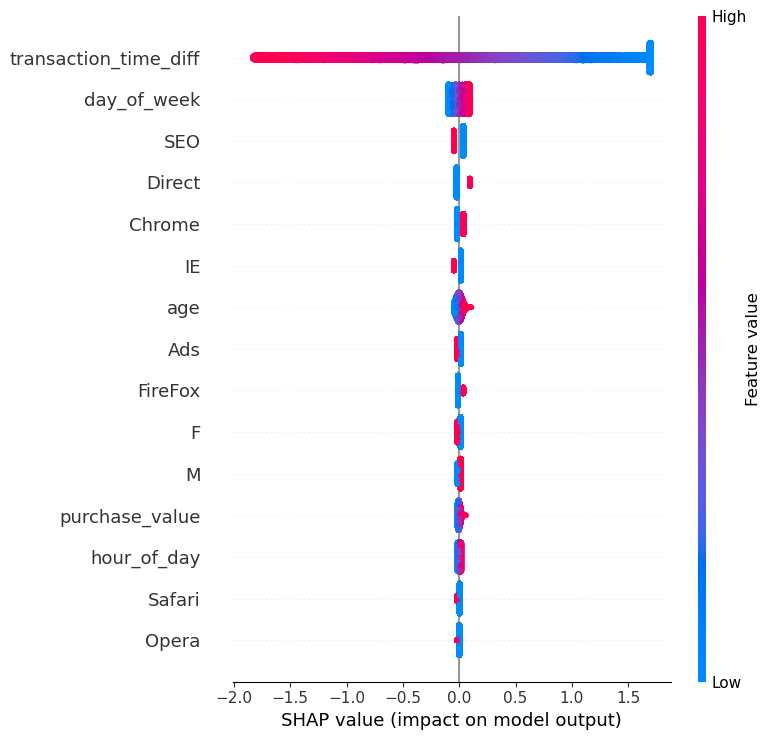

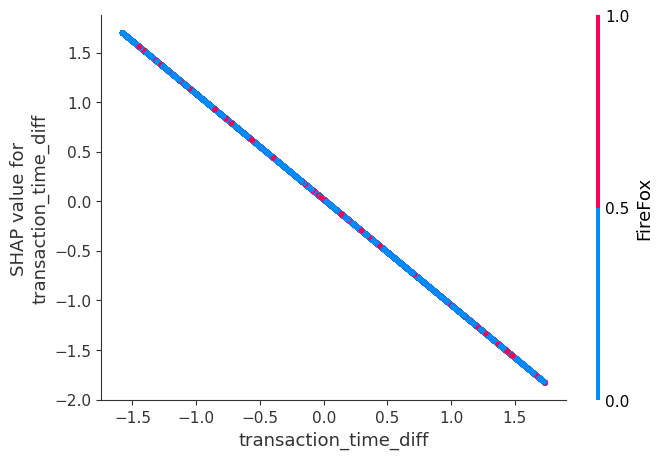

In [11]:
# Train and explain models for Fraud_Data
for name, model in models.items():
    model.fit(X_train_fraud, y_train_fraud)
    print(f"\n{name} - Fraud_Data")
    shap_analysis(model, X_train_fraud, X_test_fraud, fraud_feature_names)
    lime_analysis(model, X_train_fraud, X_test_fraud, fraud_feature_names)


Logistic Regression - CreditCard_Data


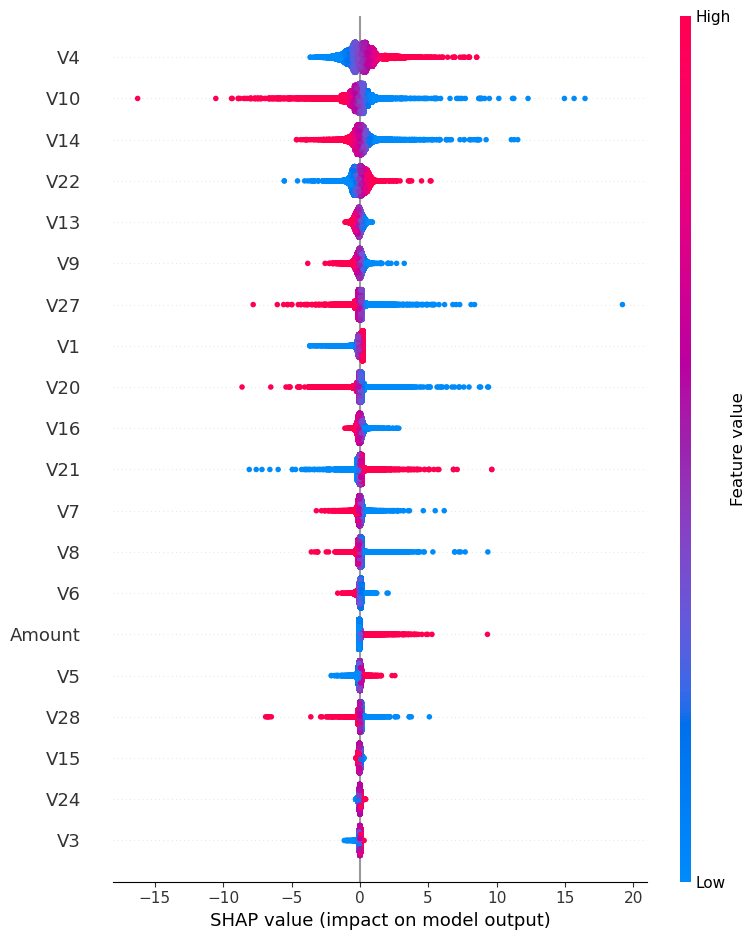

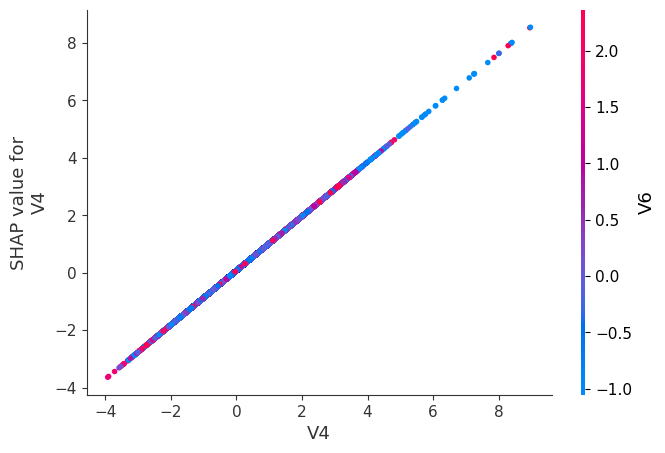

In [12]:
# Train and explain models for CreditCard_Data
for name, model in models.items():
    model.fit(X_train_credit, y_train_credit)
    print(f"\n{name} - CreditCard_Data")
    shap_analysis(model, X_train_credit, X_test_credit, credit_feature_names)
    lime_analysis(model, X_train_credit, X_test_credit, credit_feature_names)